In [1]:
import lxml.html
import lxml.etree

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def parse_file(filename):
    doc=lxml.html.parse(filename)
    table=doc.findall('//table')[0]
    rows=table.findall('./tr')
    num_rows=len(rows)
    data=np.zeros((num_rows,1+10+39), dtype=np.int64)
    for i,row in enumerate(rows):
        data[i,0]=int(row.xpath('./td/b')[0].text)
        data[i,1:]=[int(x.text) for x in row.xpath('./td')[1:-1]]
    return data

In [4]:
parse_file('raw/11.html')

array([[50130,  1704,  1686, ...,    11,     1,     3],
       [50131,  2148,  2109, ...,    19,     0,     9],
       [50134,   222,   225, ...,     0,     1,     0],
       ..., 
       [51671,   342,    64, ...,     3,     0,     0],
       [51672,   156,    57, ...,     1,     1,     0],
       [51675,   318,   336, ...,     0,     0,     0]])

In [5]:
all_data=np.zeros((0,1+10+39), dtype=np.int64)
for i in range(11,266):
    try:
        region = parse_file('raw/{}.html'.format(i))
    except:
        print ("Skipping region", i)
    all_data=np.concatenate((all_data,region))

Skipping region 41
Skipping region 42
Skipping region 43
Skipping region 44
Skipping region 53
Skipping region 54
Skipping region 55
Skipping region 56
Skipping region 61
Skipping region 104
Skipping region 108
Skipping region 109
Skipping region 110
Skipping region 111
Skipping region 224
Skipping region 225
Skipping region 227
Skipping region 228
Skipping region 229
Skipping region 230
Skipping region 231
Skipping region 232
Skipping region 233
Skipping region 234
Skipping region 235
Skipping region 236
Skipping region 237
Skipping region 238
Skipping region 239
Skipping region 240
Skipping region 241
Skipping region 242
Skipping region 243
Skipping region 244
Skipping region 245
Skipping region 246
Skipping region 247
Skipping region 248
Skipping region 249
Skipping region 250
Skipping region 251
Skipping region 252
Skipping region 253
Skipping region 254
Skipping region 255
Skipping region 256
Skipping region 257
Skipping region 258
Skipping region 259
Skipping region 260
Skipping 

In [6]:
all_data.shape

(34352, 50)

In [7]:
TOTAL=all_data[:,9]
Z=all_data[:,24]
P=all_data[:,40]
T=all_data[:,46]

In [8]:
np.sum(all_data[:,1:], axis=0)

array([47089519, 47044197,   702892, 25732037, 20748915,   608751,
       21357693,     3094, 21356448,   242408,    40946,    34061,
          38726,    20712,  2408849,    24125,     6243,   876266,
           6117,  1527905,     5242,    21213,    10444,  6382526,
          15983,    16896,     6521,     4951,   402429,     9997,
           5230,    21576,  1043879,    14642,    45959,     2946,
           6616,     3841,    17506,  3870843,     6132,    16123,
        1284328,     5694,    21130,  2633829,   120412,    19849,   113060])

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/usr/lib/python3/dist-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/usr/lib/python3/dist-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)
/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


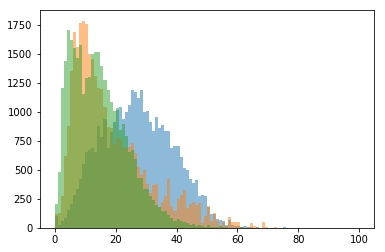

In [17]:
plt.hist(Z/TOTAL*100, bins=100, range=(0,100), alpha=0.5)
plt.hist(P/TOTAL*100, bins=100, range=(0,100), alpha=0.5)
plt.hist(T/TOTAL*100, bins=100, range=(0,100), alpha=0.5);